In [18]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
# import statsmodels.graphics.gofplots as sm
import scipy
from scipy import stats

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# Confidence Intervals

## Standard errors are used to compute Confidence Intervals

The standard deviation measures the variability of a set of data: how much the data points are spread out around a mean.

The standard error of the mean meaures the variability of the sample means in a sampling distribution of means: how much the sample mean is spread out from the true mean.  

The standard error of the mean is a measure of the precision of the estimate of the mean from a sample to the true mean of the population.  The SEM is the standard deviaton of the sampling distribution of the sample means.  

SEM= $\sigma$ / $\sqrt{n}$.  You use the standard error of the mean in the computation of the confidence interval of the mean.

**The confidence interval** of the mean is the range of the estimate of the unknown mean, bounded by the lower bound and upper bound of the range and computed at a designated confidence level (often at a 95% confidence level).  The confidence interval for the true mean is: 

$\bar{x} - \frac{c_n*\sigma}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_n*\sigma}{\sqrt(n)}$.

- where $\bar{x}$ is the sample mean 
- where $c_n$ is the critical value of z using the standard normal probability distribution at a certain confidence level 
- where $\sigma$ is the known population standard deviation 
- where n is the sample size 
- where $\sigma$/$\sqrt{n}$ is the SEM

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling distribution of the samples means from any distritbution to be normally approximated, at a sufficiently large sample size).

# Confidence Interval for Mean of One Sample and Known Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.   We will imagine a situation where we do not know the mean of the population but we do know the standard deviation of the population, $\sigma$=1.2.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$.  

In [19]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
mean_BP

101.81666666666666

In [20]:
# sample standard deviation
np.std(data_BP,ddof=1)

0.9847165412780786

In [21]:
data_BP

array([102.5, 101.7, 103.1, 100.9, 100.5, 102.2])

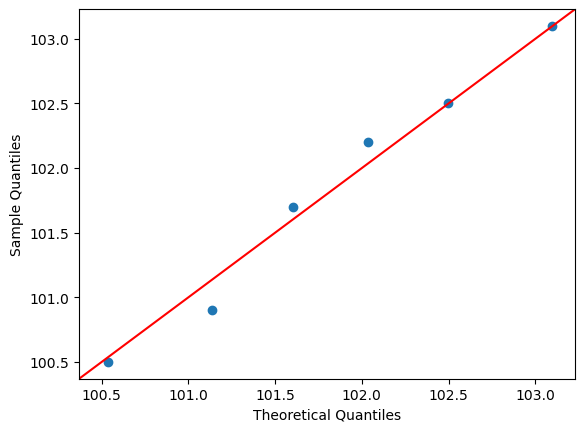

In [22]:
# let's first look at the distribution of the data
sm.qqplot(data_BP,line='45',loc=mean_BP,scale=1.2)
plt.show()

In [65]:
stats.shapiro(data_BP)

ShapiroResult(statistic=0.9667627811431885, pvalue=0.8700257539749146)

If the population distribution is normal or the sample size is sufficiently large, then can use the critical z value \
The mean of the sampling distribution of the mean is equal to the population mean. \
The standard error of the mean is equal to the $\sigma$ / ${\sqrt(n)}$.

In [23]:
# standard deviation = 1.2
SEM_BP=1.2/np.sqrt(6)
SEM_BP

0.48989794855663565

The selection of the confidence level determines the confidence that the CI will contain the true mean value.  A common choice for the confidence level is 95%.  This is 0.95 probability of the area under the normal probability density curve covered or accounted for in future samples.  Probability areas outside of this area are less than 0.05.  Becasue the normal curve is symetric, half of this probability is on the lower tail and half on the upper tail. For a confidence interval of confidence level of C, the alpha level is 1-C and the area in each tail (for a two-tailed confidence level) is equal to (1-C)/2.

In [24]:
print(norm.ppf(0.025))
print(norm.ppf(0.975))

-1.9599639845400545
1.959963984540054


Text(0.5, 1.0, 'Normal Distribution with Mean=0, SD=1')

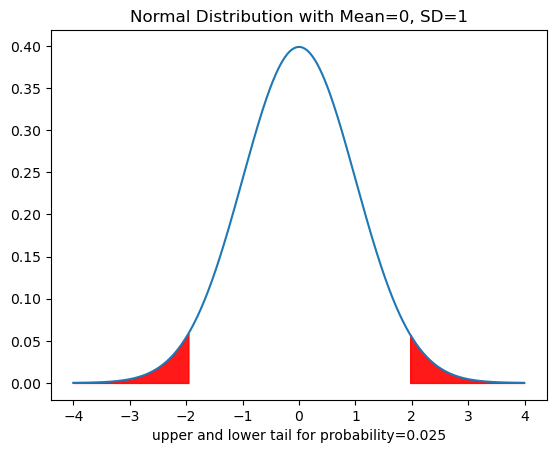

In [25]:
x_A = np.arange(-4,4,.01)
normal_A=norm.pdf(x_A,loc=0,scale=1)
ax=sns.lineplot(x=x_A,y=normal_A)
ax=plt.fill_between(x_A,normal_A, where=(x_A <-1.96),color='r',alpha=.9)
ax=plt.fill_between(x_A,normal_A, where=(x_A >1.96),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("Normal Distribution with Mean=0, SD=1")

The critical value from the standard normal distribution is the z value realizing the probability of observing a value at least as extreme as positive z, or the upper critical value.  For p=0.025, the upper critical z value such that P(Z>$/z_c$)=0.025 = 1.96.

In [26]:
# 95% CI calculation
# lower bound
print("Lower bound = " + str(mean_BP - 1.96 * 1.2/np.sqrt(6)))
# upper bound
print("Upper bound = " + str(mean_BP + 1.96 * 1.2/np.sqrt(6)))

Lower bound = 100.85646668749565
Upper bound = 102.77686664583767


In [27]:
# check with python conmputing
import statsmodels as sm
# statsmodels.stats.weightstats._zconfint_generic(mean,std_mean(standard error),alpha,alternative)
CI_BPz=sm.stats.weightstats._zconfint_generic(mean_BP,1.2/np.sqrt(6),0.05,alternative='two-sided')
print ("The 95% CI is = " + str(CI_BPz))

The 95% CI is = (100.8564843313956, 102.77684900193772)


In [28]:
norm.ppf(0.975,loc=mean_BP, scale=1.2/np.sqrt(6))

102.77684900193772

In [29]:
norm.ppf(0.025,loc=mean_BP, scale=1.2/np.sqrt(6))

100.8564843313956

# Confidence Interval for Mean of One Sample and Unknown Population Standard Deviation
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius. We now do not know the population mean or standard deviation, and so will estimate the from the sample.

We will calculate the 95% confidence intervals for the true mean using our sampled data. In cases where we want to estimate the true population mean and are estimating the standard deviation using the sample standard deviation we have to use the t-distribution to calculate our confidence intervals.

The confidence interval for the true mean for unknown standard deviation: \
$\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.

where $\bar{x}$ is the sample mean \
where $c_t$ is the critical value of t using the t probability distribution at a certain confidence level \
where s is the sample standrd deviation \
where n is the sample size 

This is true when the distribution is normal.  For large sample sizes from other population distributions, the confidnece interval is approximately corrected by the Central Limit Theorem (the CLT causes the sampling dstribution of the samples means from any dsirtbution to be normally approximated, at a sufficiently large sample size).

The t-distribution is described by the degrees of freedom. For a sample of size n, the t distribution will have n-1 degrees of freedom.  As sample size increases and the dof increase, the t distribution becomes approximately normal.

# Boiling point example
Let's estimate the mean boiling temperature of a special liquid, in degrees Celsius.  We do not know the mean of the population and we do not know the standard deviation of the population, $\sigma$=unknown.  We select a sample of sample size=n and find the sample mean =  $\bar{x}$ and the sample standard devation = s.

In [30]:
# n = 6 samples
data_BP=np.array([102.5,101.7,103.1,100.9,100.5,102.2])
mean_BP=np.mean(data_BP)
print("Sample mean = " + str(mean_BP))
std_BP=np.std(data_BP,ddof=1)
print("Sample std = " + str(std_BP))
print("SEM = " + str(std_BP/np.sqrt(6)))

Sample mean = 101.81666666666666
Sample std = 0.9847165412780786
SEM = 0.40200884456826363


Let's first calculate the $c_t$ values. The degrees of freedom is = n-1 for the t distribution.  You can find this on the t-table or this can be done using the [scipy.stats t library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html).

In [31]:
from scipy.stats import t
ct = t.ppf(0.975,df=5)
print("Critical value of t = " + str(ct))

Critical value of t = 2.5705818366147395


Text(0.5, 1.0, 't Distribution with dof=5')

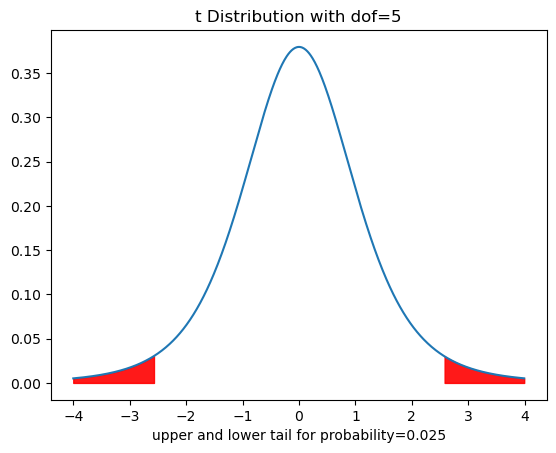

In [32]:
x_B = np.arange(-4,4,.01)
t_B=t.pdf(x_B,5)
ax=sns.lineplot(x=x_B,y=t_B)
ax=plt.fill_between(x_B,t_B, where=(x_B <-2.57),color='r',alpha=.9)
ax=plt.fill_between(x_B,t_B, where=(x_B >2.57),color='r',alpha=.9)
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("t Distribution with dof=5")

The t-critical value is the number of standard errors above and below the mean that capture a given proportion of the sampling distribution of $\bar{x}$ for a given degrees of freedom. When we use a margin of error (margin of error = $\frac{c_t*s}{\sqrt(n)}$), it is to estimate the population parameter  μ . But we also don't know the population parameter  σ , so we estimate it with our sample standard deviation s. When we estimate both of these parameters using sample statistics, we obtain more variation in the sampling distribution than if we were to just estimate  μ. Hence we must use a t-distribution of degrees of freedom n−1 which accounts for the increased variability by increasing the area under the tails. When we calculate the margin of error, we are multiplying the standard error by the number of standard errors needed to capture  μ  a given proportion of the time (the t critical value).

In [33]:
LB = mean_BP-ct*std_BP/np.sqrt(6)
UB = mean_BP+ct*std_BP/np.sqrt(6)
print(str(LB) + " <= true mean= <= " +str(UB))

100.78327003266101 <= true mean= <= 102.85006330067232


In [34]:
# check with python computing
# statsmodels.stats.weightstats._tconfint_generic(mean,std_mean(standard error),dof,alpha,alternative)
CI_t=sm.stats.weightstats._tconfint_generic(mean_BP,std_BP/np.sqrt(6),5,0.05,alternative='two-sided')
print("95% CI = " + str(CI_t))

95% CI = (100.78327003266101, 102.85006330067232)


This 95% confidence interval we generated using our sample provides us with an estimated range of of values which we are confident contain the true mean of boiling point.  We are confident (at the 95% confidence level) that of all 95% confidence levels computed with this data, 95% of them would contain the true mean boing point.  

The confidence level puts represents the long-run proportion of corresponsing CIs that contain the true population mean. 

Since we are calculating a 95% confidence interval, if we were to repeat this process 20 times and calculate the confidence intervals for all of those times, we would expect 19 of the confidence interval ranges to contain the true mean.  Or 0.05 * 20=1 on average would be intervals not covering the true mean.

If we were to repeat this process 100 times....

# One sample t-test

Let's find the probability that the mean BP of this sample is different than a value of 104.  This is a one-sample t-test. 

The null hypothesis is that the mean BP of the sample is the same as that of 104 (our hypothetical or true mean for BP

H0:  population mean from which the sample came = hypothetical mean of 104).  

HA:  the population mean from which the sample came is different than the mean of 104 (either higher or lower)

In [83]:
stats.ttest_1samp(a=data_BP, popmean=104,alternative="two-sided")

Ttest_1sampResult(statistic=-5.4310579551505205, pvalue=0.0028694019033996166)

In [84]:
t_BPtest=(mean_BP-104) / (std_BP/np.sqrt(6))
t_BPtest

-5.43105795515052

In [85]:
2*t.cdf(-5.43105795515052,5)

0.002869401903399619

In [86]:
2*t.cdf(mean_BP,(len(data_BP)-1),loc=104,scale=(std_BP/np.sqrt(len(data_BP))))

0.002869401903399619

Text(0.5, 1.0, 't Distribution with dof=5')

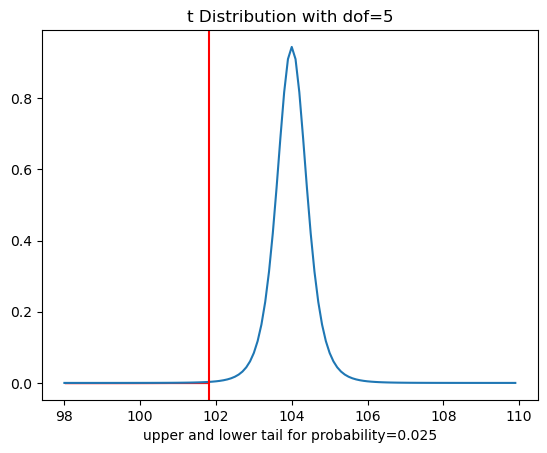

In [89]:
x_B1 = np.arange(98,110,.1)
t_B1=t.pdf(x_B1,5,loc=104,scale=(std_BP/np.sqrt(6)))
ax=sns.lineplot(x=x_B1,y=t_B1)
ax=plt.fill_between(x_B1,t_B1, where=(x_B1 <mean_BP),color='r',alpha=.9)
plt.axvline(x=mean_BP,color="red")
plt.xlabel("upper and lower tail for probability=0.025")
plt.title("t Distribution with dof=5")